1. Simulate the paramters using the following codes,

In [16]:
## Simulation ##
set.seed(1003998757)
beta0 <- rnorm(1, mean = 0, sd = 1) ## The population 
beta1 <- runif(n = 1, min = 1, max = 3) ## The population beta1 
sig2 <- rchisq(n = 1, df = 25) ## The error variance sigma^2

## Multiple simulation may require loops ## 
nsample = 5 ## Sample size
n.sim <- 100 ## The number of simulations 
sigX <- 0.2 ## The variances of X

## Simulate the predictor variable ##
X <- rnorm(nsample, mean = 0, sd = sqrt(sigX))


2. Fix the sample size nsample = 5 . Execute 100 simulations (i.e., n.sim = 100). 
For each simulation estimate the regression coefficients. Calculate the mean of the estimates from the different simulations. Comment on your observations.

In [17]:

# nsample is 5.
# fix n.sim to 100

b0 <- vector() ## saves the sample estimates of beta0
b1 <- vector() ## saves the sample estimates of beta1
sigy <- vector()  ## Saves the estimate of error variance





varb1 <- vector()
varb0 <- vector()

conf_z_b1 <- vector()


count_b0z = 0
count_b1z = 0
count_b0t = 0
count_b1t = 0


for(i in 1:n.sim){
    Y <- beta0 + beta1*X + rnorm(n = nsample, mean = 0, sd = sqrt(sig2))
    model <- lm(Y ~ X)
    
    alpha <- 0.05
    SXX <- (var(X) * (nsample -1))
    
    b0[i] <- coef(model)[1]
    b1[i] <- coef(model)[2]
    
    varb1[i] <- sig2/(var(X) * (nsample -1))
#     (var(X) * 4) SXX
    varb0[i] <- sig2*((1/nsample) + (mean(X)^2/(var(X) * (nsample-1))))
    
    sigy[i] <- summary(model)$sigma^2
    

    b0_l_z = b0[i] - qnorm(1 - (alpha)/2) * (sqrt(sig2) * sqrt((1/nsample) + mean(X)^2/SXX))
    b0_r_z = b0[i] + qnorm(1 - (alpha)/2) * (sqrt(sig2) * sqrt((1/nsample) + mean(X)^2/SXX))
    
    b1_l_z = b1[i] - qnorm(1 - (alpha)/2) * (sqrt(sig2)/sqrt(SXX))
    b1_r_z = b1[i] + qnorm(1 - (alpha)/2) * (sqrt(sig2)/sqrt(SXX))
#     print(c(b1_ll_z, b1_ul_z))
    
    b0_l_t = b0[i] - qt(1 - (alpha/2), df = (nsample - 2))*(sqrt(sigy[i])*sqrt((1/nsample) + (mean(X)^2/SXX)))
    b0_r_t = b0[i] + qt(1 - (alpha/2), df = (nsample - 2))*(sqrt(sigy[i])*sqrt((1/nsample) + (mean(X)^2/SXX)))
                            
    b1_l_t = b1[i] - qt(1 - (alpha/2), df = (nsample - 2))*(sqrt(sigy[i])/(sqrt(SXX)))
    b1_r_t = b1[i] + qt(1 - (alpha/2), df = (nsample - 2))*(sqrt(sigy[i])/(sqrt(SXX)))
    

    if(beta0 <= b0_r_z & beta0 >= b0_l_z){  # 95 b0z
        count_b0z = count_b0z + 1
        
    }
    
    if(beta1 <=  b1_r_z & beta1 >= b1_l_z){  # 97 b1z
        count_b1z = count_b1z + 1
        
    }
    
    if(beta0 <=  b0_r_t & beta0 >= b0_l_t){  # 94 b0t
        count_b0t = count_b0t + 1
        
    }
    

    if(beta1 <=  b1_r_t & beta1 >= b1_l_t){  # 96 b1t
        count_b1t = count_b1t + 1
        
    }  
    
    
}

print("Proportions:")

print("B0z:")
print(count_b0z)

print("B1z:")
print(count_b1z)

print("B0t:")
print(count_b0t)

print("B1t:")
print(count_b1t)


print('---------------------------------------------------------------------------')


m_b0 <- mean(b0)
a_0 = 'mean of b0:'
print(paste(a_0, m_b0))




m_b1 <- mean(b1)
a_1 = 'mean of b1:'
print(paste(a_1, m_b1))




m_sigy <- mean(sigy)
a_s = 'mean of sigy:'
print(paste(a_s, m_sigy))



print('actual beta0:')
print(beta0)

print('actual beta1:')
print(beta1)

print('actual sig:')
print(sig2)

[1] "Proportions:"
[1] "B0z:"
[1] 95
[1] "B1z:"
[1] 97
[1] "B0t:"
[1] 94
[1] "B1t:"
[1] 96
[1] "---------------------------------------------------------------------------"
[1] "mean of b0: -1.9450101451097"
[1] "mean of b1: 1.1154865004255"
[1] "mean of sigy: 23.7765107665281"
[1] "actual beta0:"
[1] -1.83326
[1] "actual beta1:"
[1] 1.022691
[1] "actual sig:"
[1] 22.28898


3. Plot the histogram of each of the regression parameters. Explain the pattern of the distribution.

[1] "TODO: update description"
[1] "We see that this is mostly a normal distribition with one peek."


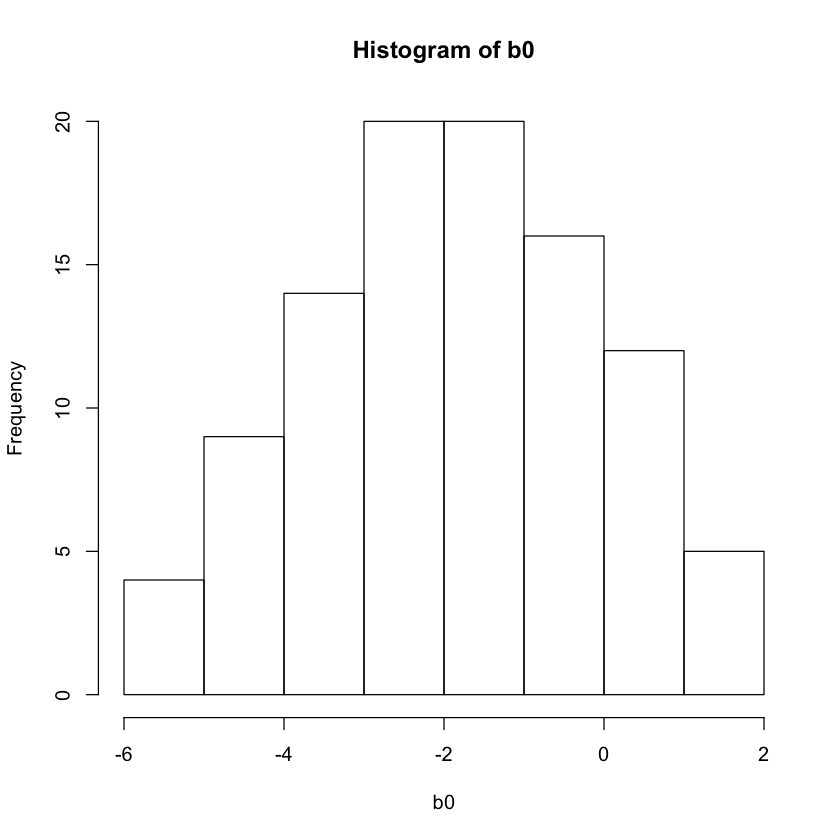

[1] "We see that this is mostly a normal distribution."


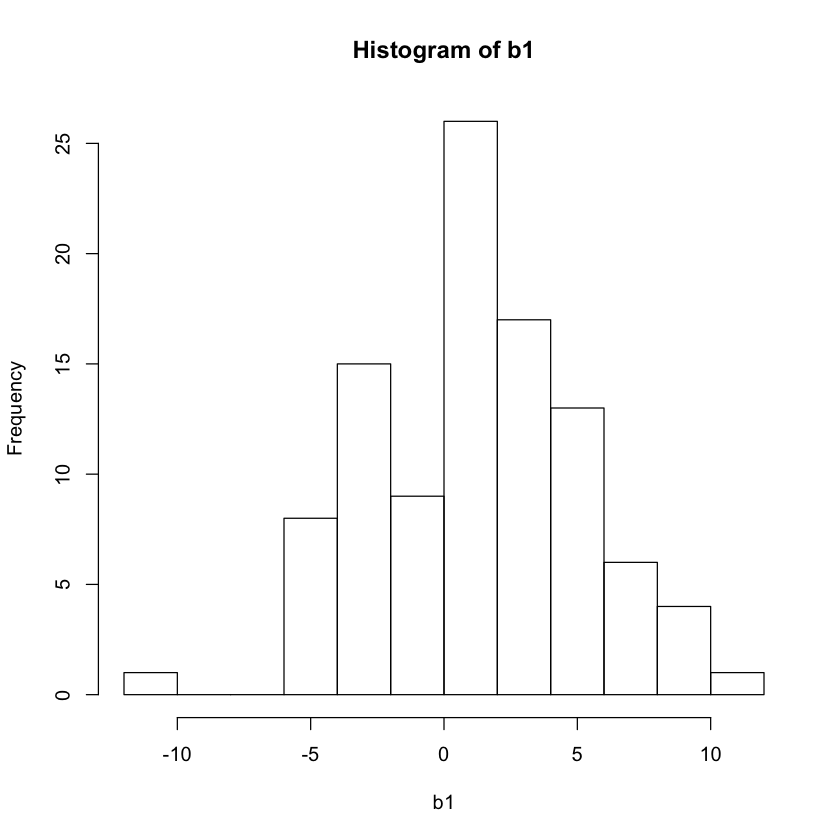

[1] "We see that this distribution is strongly left skewed."


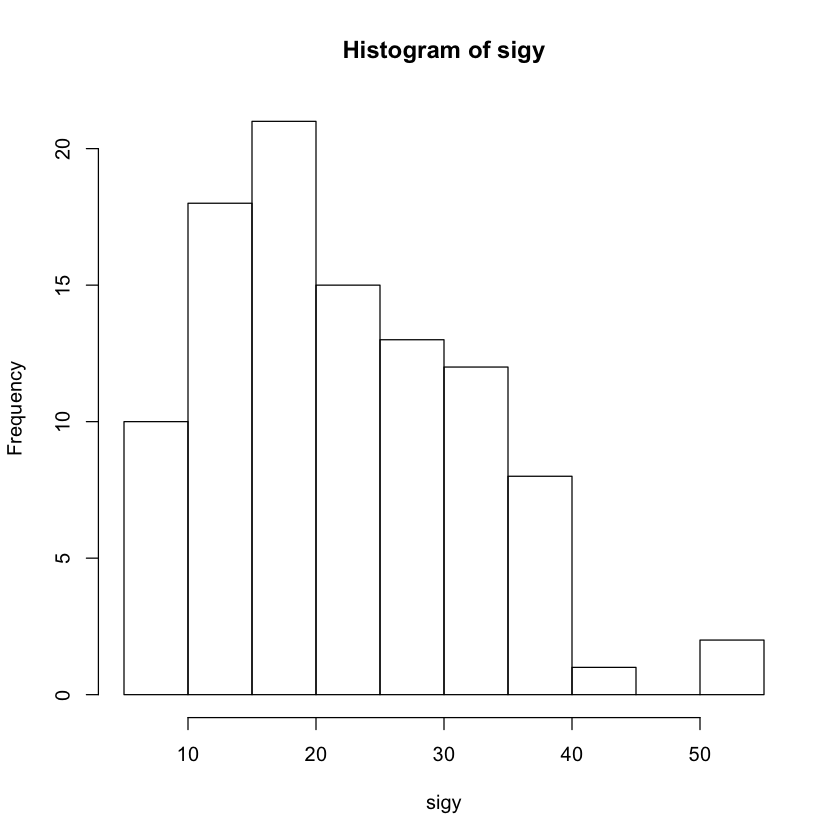

In [7]:
hist(b0)
hist(b1)
hist(sigy)

4.Obtain the variance of the regression parameters for each simulation. This is the variance obtained from the outputs of the lm function. Calculate their means. How do these means compare to the true variance of the regression parameter estimates?

In [4]:

print('means of var of b0, b1:')
var(b0)
var(b1)

print('true var of b0, b1:')
mean(varb0)
mean(varb1)


[1] "means of var of b0, b1:"


[1] 4.832409

[1] 26.30268

[1] "true var of b0, b1:"


[1] 4.794135

[1] 32.66404

5.Construct the 95% t and z confidence intervals for β0 and β1 during every simulation. What is the proportion of the intervals for each method containing the true value of the parameters? Is this consistent with the definition of confidence interval? What differences do you observe in the t and z confidence intervals?

In [208]:
# find confidence interval for each distrbution, find the proportion (ie how many intervals among the 100 contains
# the true mean.

# is this consistent with the confidence interval definition

# differences in between t/z?
# count = 0 
# if(beta1 <= b1_right_t & beta1 >= b0_left_t){
#     count = count + 1
#     print(count)
# }



[1] 1


6.For steps 2-4 the sample size was fixed at 5. Start increasing the sample size (e.g., 10, 25, 50, 100) and run steps 2-4. Explain what happens to the mean, variance and distribution of the estimates as sample size increases.

In [ ]:
# do 2 --> 4 with 5 10 15 20 and explain what happens to the mean/var/distribution as sample size increases.

# mean of b0,b1 should approach to the actual value beta0 and beta1
# variance will decrease as the sample size increases
# distrbution --> still normal, look steeper.

7.Choose the largest sample size you have used in step 5. Fix the sample size to that and start changing the error variance (sig2). You can increase and decrease the value of the error variance. For each value of error variance execute steps 2-4. Explain what happens to the mean, variance and distribution of the estimates as the error variance changes.

In [ ]:
# from 6, choose the largest sampple size and change sig2 (one bigger and one smaller) and do 2-4. 
#  explain distribution of mean/var/distriubution as error variance increases.


# mean = same
# increase variance

# 15000 -> Sample size, sig = change df, one to 10000, one to 25.

# as df increases, we have more randomness in our linear regression model
# less randomnes --> graph will become stepper 
# --> compare the graphs 